In [2]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from sklearn.inspection import permutation_importance
# import pandas as pd
from scipy.fft import fft

In [3]:
# Load data and print the classes
# TODO: change "gesture_dict.npy" to the filename of your exercise's posture data
data1 = np.load("Alejandro_gesture_dict.npy",allow_pickle=True)
data1.item().keys()


dict_keys(['Shoulder press Good', 'Shoulder press elbow flare', 'Shoulder press not full extension'])

In [4]:
data1.item().get('Shoulder press Good').pop(10)
print(len(data1.item().get('Shoulder press Good')))

10


In [25]:
data2 = np.load("Amy_gesture_dict.npy",allow_pickle=True)
data2.item().keys()
data2.item()['Shoulder press Good'][3] = data2.item()['Shoulder press Good'][2]
data2.item()['Shoulder press Good'][4] = data2.item()['Shoulder press Good'][6]
print(len(data2.item()['Shoulder press Good'][4]))
print(len(data2.item().get('Shoulder press Good')))

125
10


In [26]:
data3 = np.load("gesture_dict_Nandini.npy",allow_pickle=True)
data3.item().keys()
print(data3.item().get('Shoulder press Good'))

[array([[-295.898438,  403.320313,  955.078125, ...,   40.049999,
          -2.85    ,    5.55    ],
       [-281.25    ,  405.273438,  949.21875 , ...,   38.25    ,
          -2.85    ,    4.05    ],
       [-284.179688,  391.601563,  957.03125 , ...,   38.400002,
          -5.7     ,    3.6     ],
       ...,
       [-196.289063,  126.953125,  997.070313, ...,   28.65    ,
          -5.4     ,   29.1     ],
       [-284.179688,  273.4375  , 1129.882813, ...,   30.15    ,
          -5.4     ,   27.75    ],
       [-231.445313,  158.203125, 1081.054688, ...,   31.65    ,
          -5.85    ,   26.25    ]]), array([[-2.90039063e+02,  4.83398438e+02,  9.17968750e+02, ...,
         3.79500010e+01, -2.85000000e+00,  2.25000000e+00],
       [-3.11523438e+02,  4.84375000e+02,  9.19921875e+02, ...,
         3.82500000e+01, -2.85000000e+00,  1.20000000e+00],
       [-3.02734375e+02,  4.78515625e+02,  9.30664063e+02, ...,
         3.79500010e+01, -2.10000000e+00,  1.95000000e+00],
       ...,
 

In [27]:
#npdict = {**data1.item(), **data2.item(), **data3.item()}
npdict = {}
for gesture in data3.item().keys():
    npdict[gesture] = ((data3.item().get(gesture)+data2.item().get(gesture)+data1.item().get(gesture)))
# Save the combined dictionary to a new numpy file
np.save("combined_gesture_dict.npy", npdict)
print(npdict)
print(len(npdict.get('Shoulder press Good')))

{'Shoulder press Good': [array([[-295.898438,  403.320313,  955.078125, ...,   40.049999,
          -2.85    ,    5.55    ],
       [-281.25    ,  405.273438,  949.21875 , ...,   38.25    ,
          -2.85    ,    4.05    ],
       [-284.179688,  391.601563,  957.03125 , ...,   38.400002,
          -5.7     ,    3.6     ],
       ...,
       [-196.289063,  126.953125,  997.070313, ...,   28.65    ,
          -5.4     ,   29.1     ],
       [-284.179688,  273.4375  , 1129.882813, ...,   30.15    ,
          -5.4     ,   27.75    ],
       [-231.445313,  158.203125, 1081.054688, ...,   31.65    ,
          -5.85    ,   26.25    ]]), array([[-2.90039063e+02,  4.83398438e+02,  9.17968750e+02, ...,
         3.79500010e+01, -2.85000000e+00,  2.25000000e+00],
       [-3.11523438e+02,  4.84375000e+02,  9.19921875e+02, ...,
         3.82500000e+01, -2.85000000e+00,  1.20000000e+00],
       [-3.02734375e+02,  4.78515625e+02,  9.30664063e+02, ...,
         3.79500010e+01, -2.10000000e+00,  1.9500

In [54]:
data = np.load("gesture_dict.npy",allow_pickle=True)
data.item()["Shoulder press Good"].pop(10)
for i in range (0,10):
    print(len(data.item()["Shoulder press not full extension"][i]))
data.item()["Shoulder press not full extension"][3] = data.item()["Shoulder press not full extension"][1]
print(len(data.item()["Shoulder press not full extension"][3]))

125
125
125
14
125
125
125
125
125
125
125


Shoulder press Good (10, 125, 21)


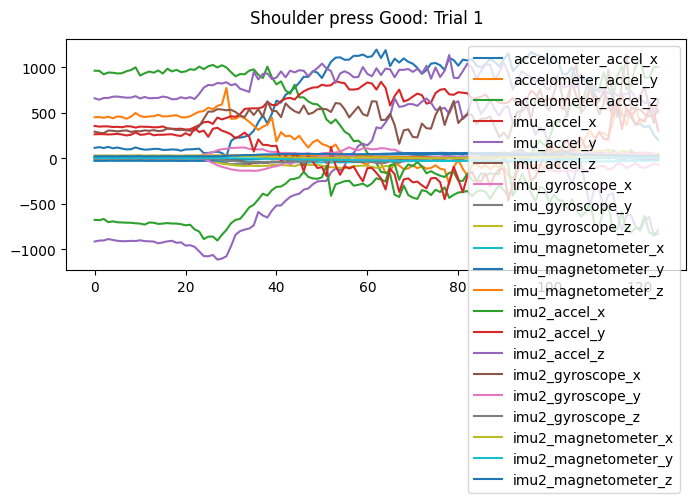

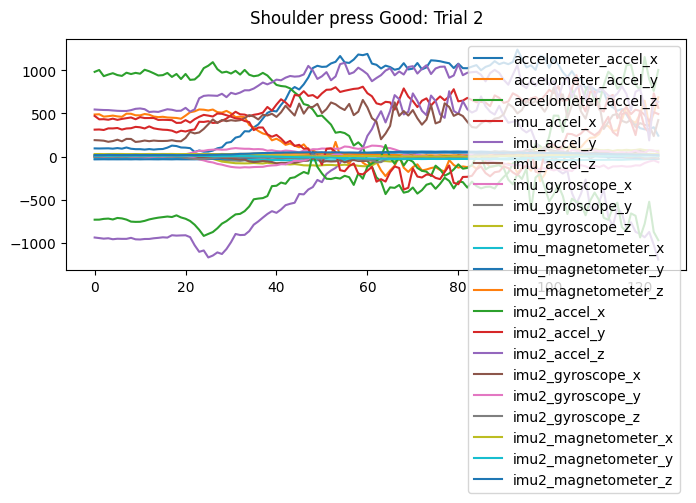

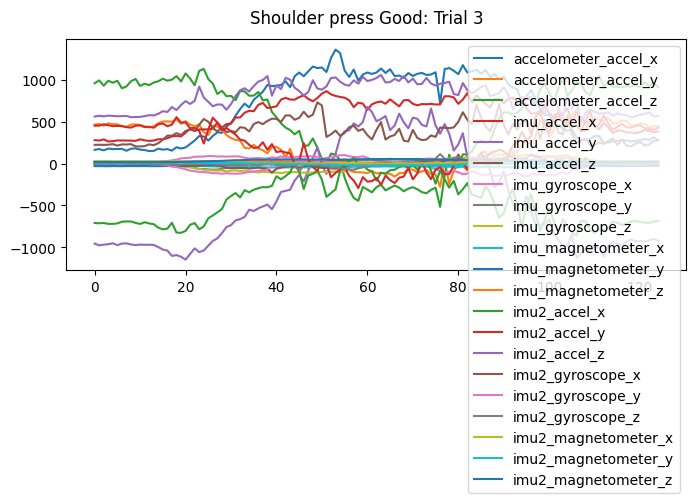

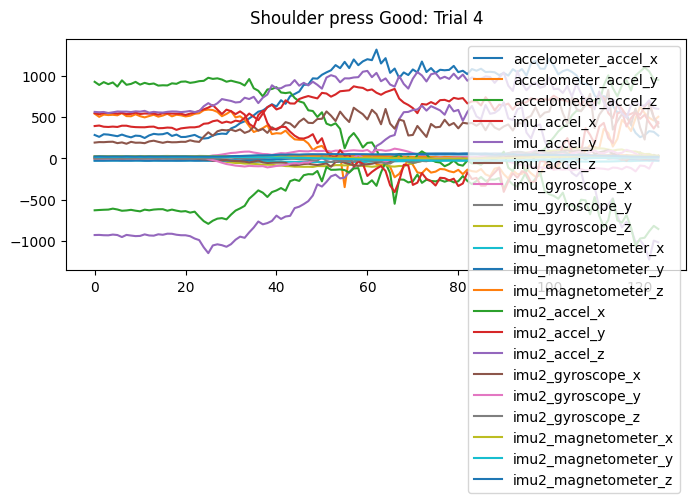

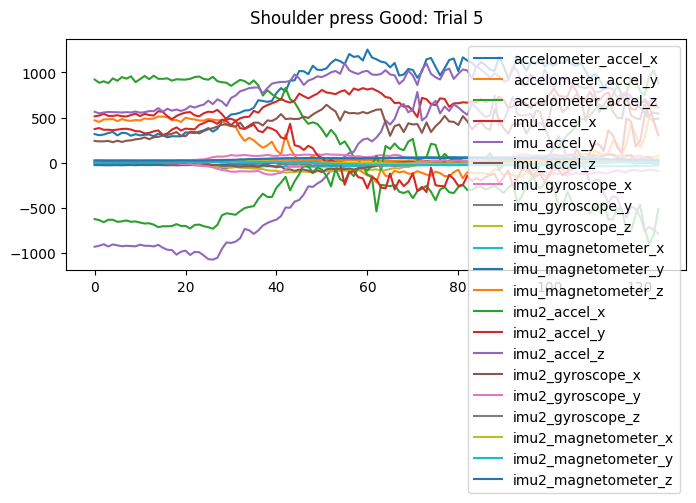

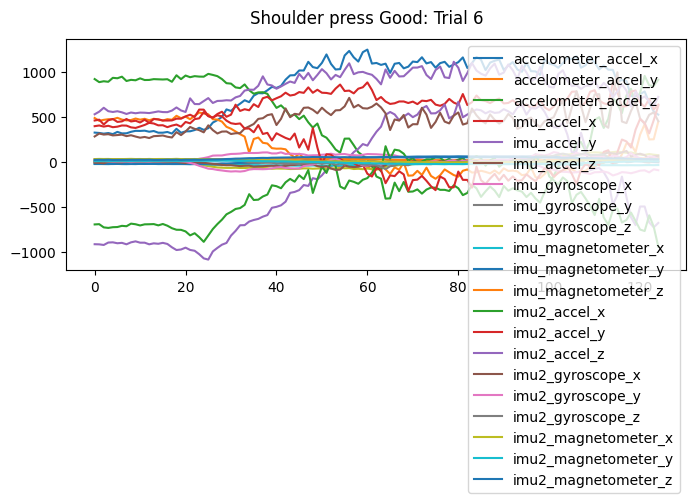

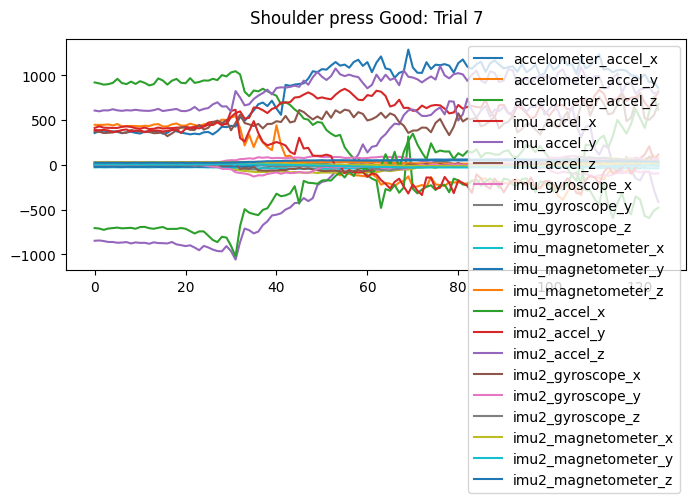

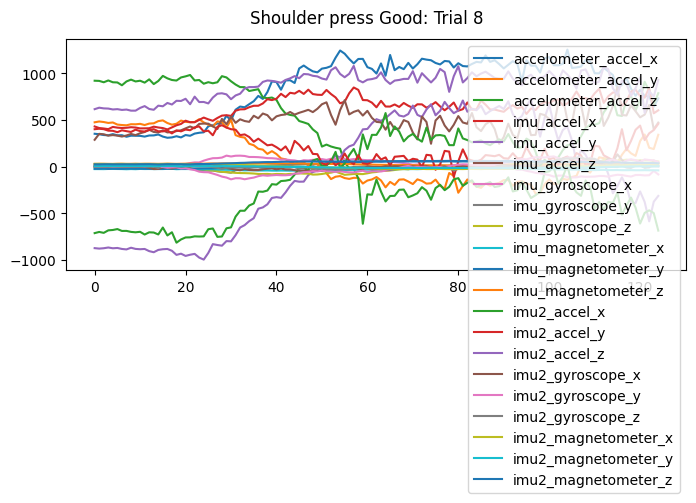

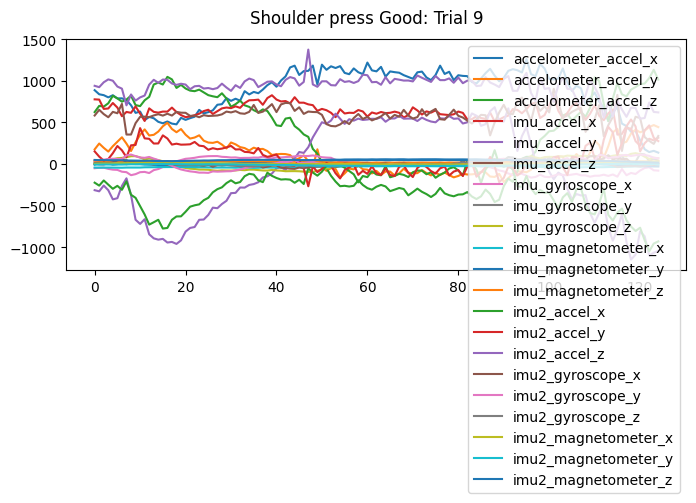

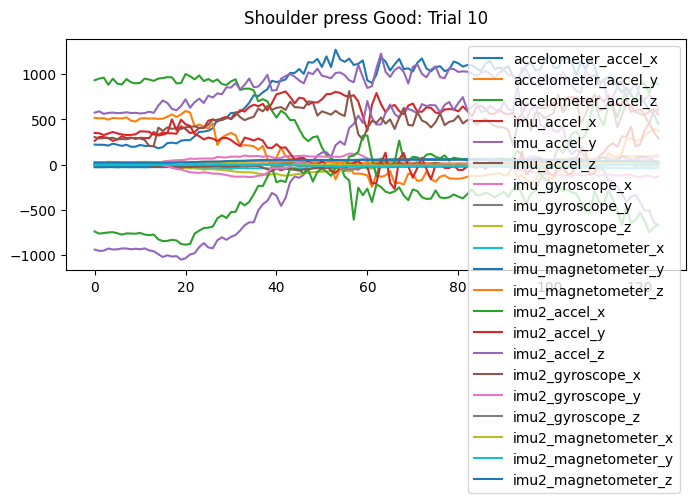

Shoulder press elbow flare (10, 125, 21)


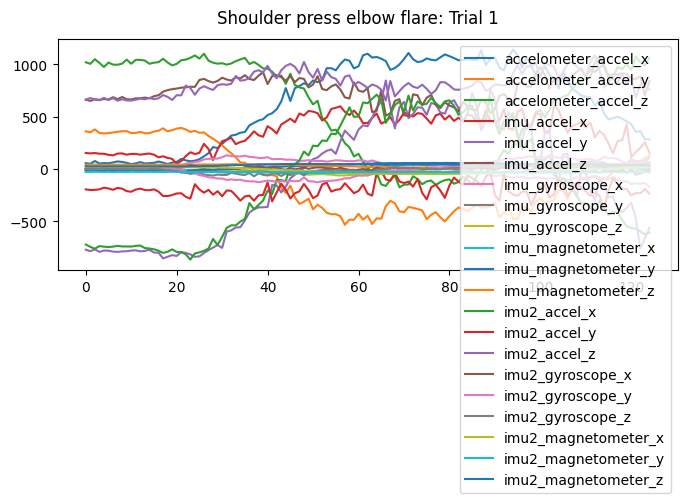

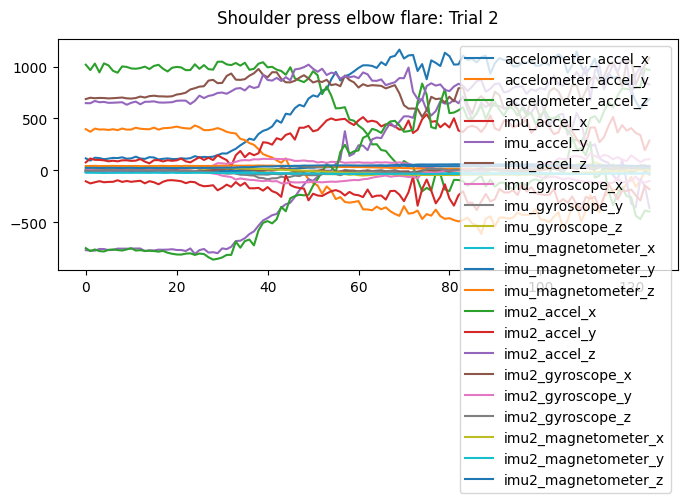

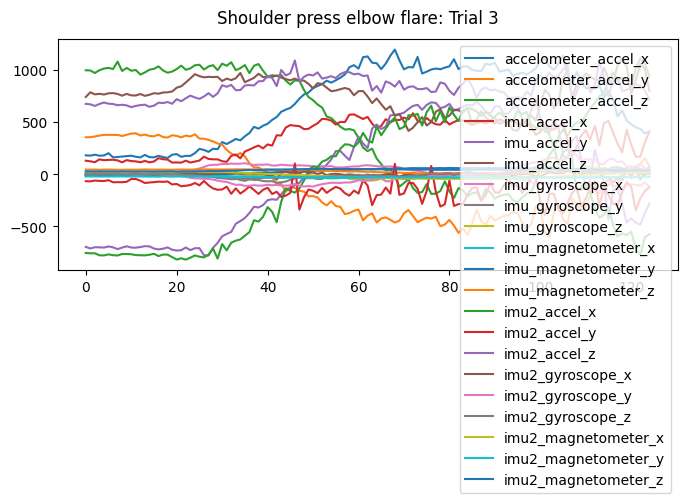

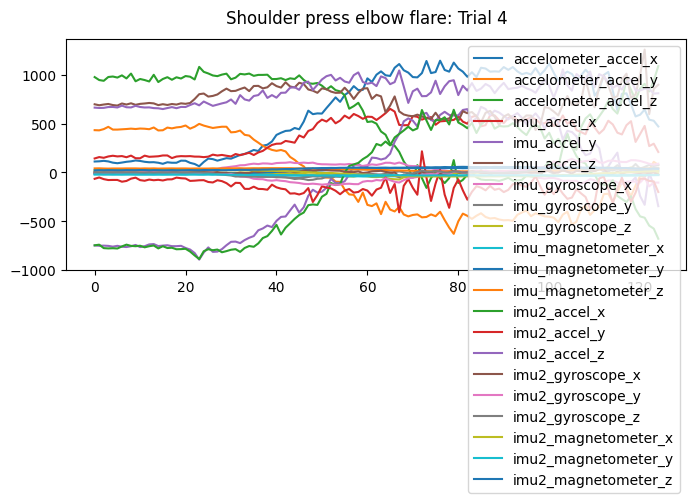

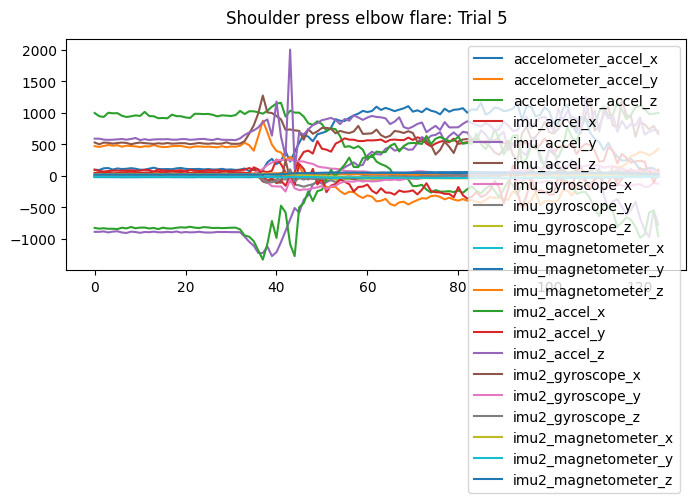

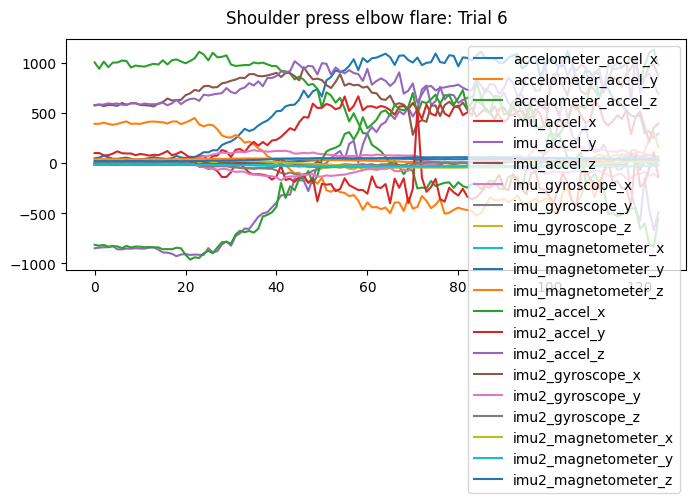

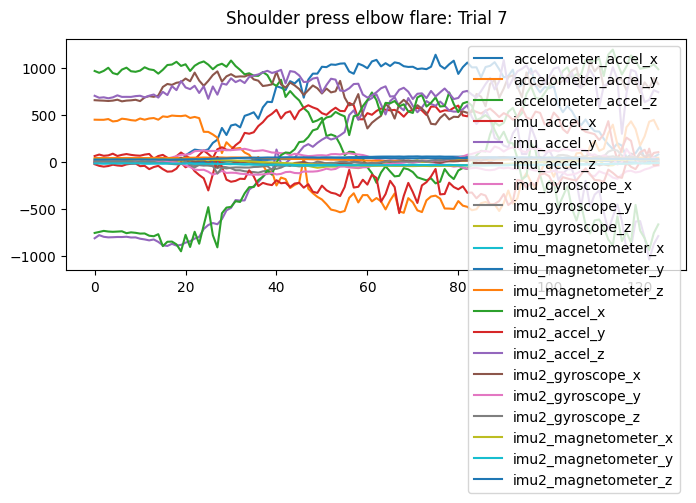

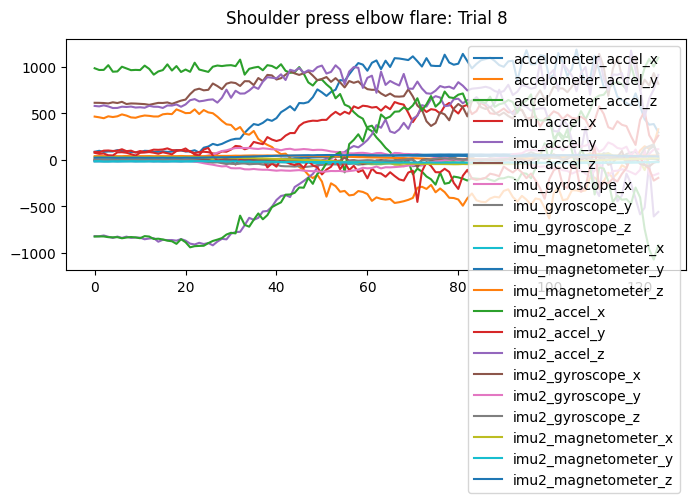

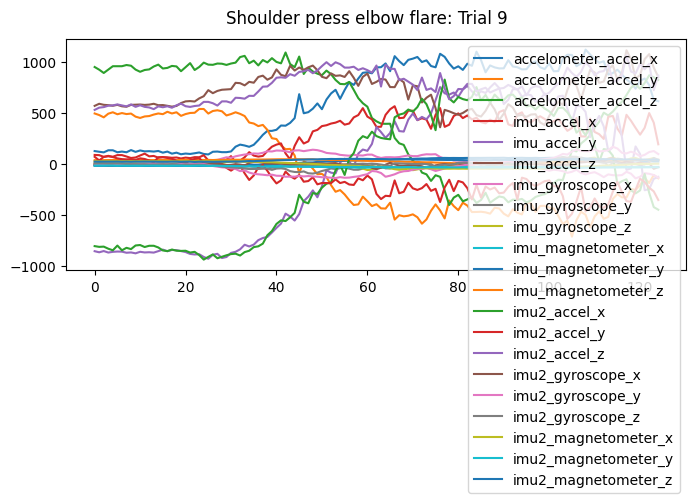

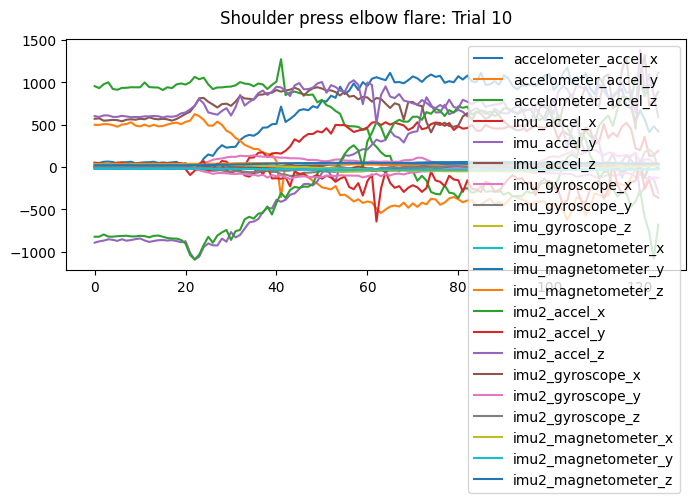

Shoulder press not full extension (10, 125, 21)


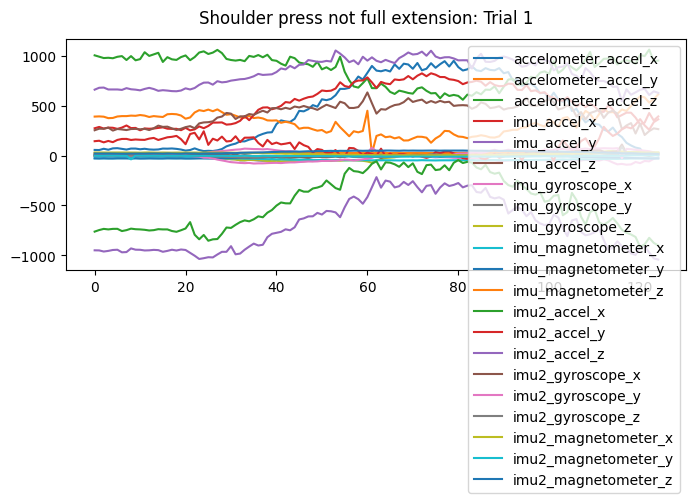

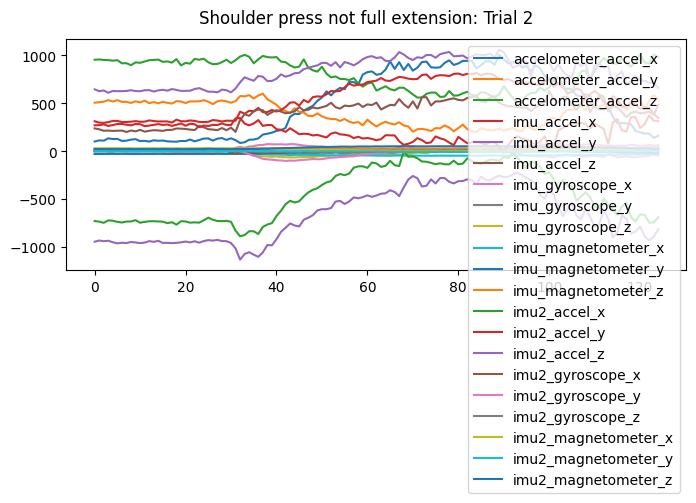

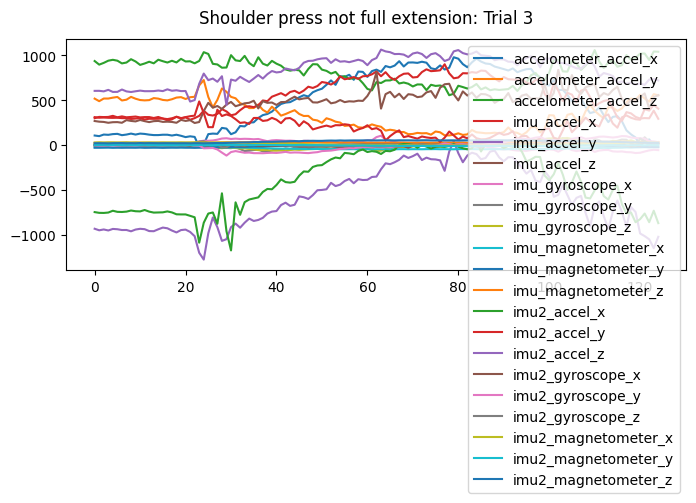

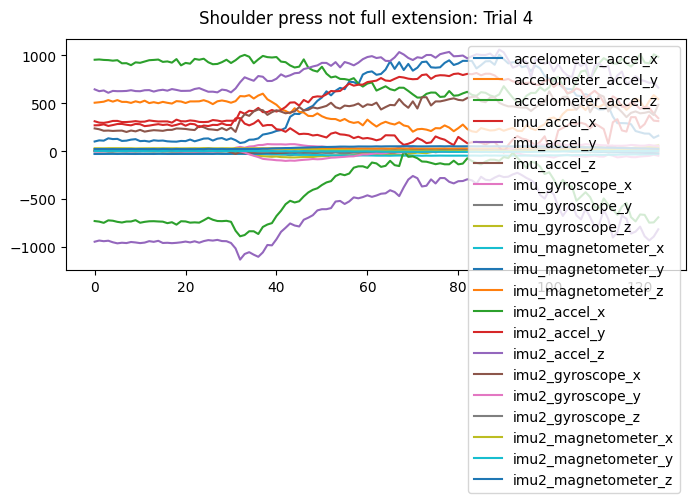

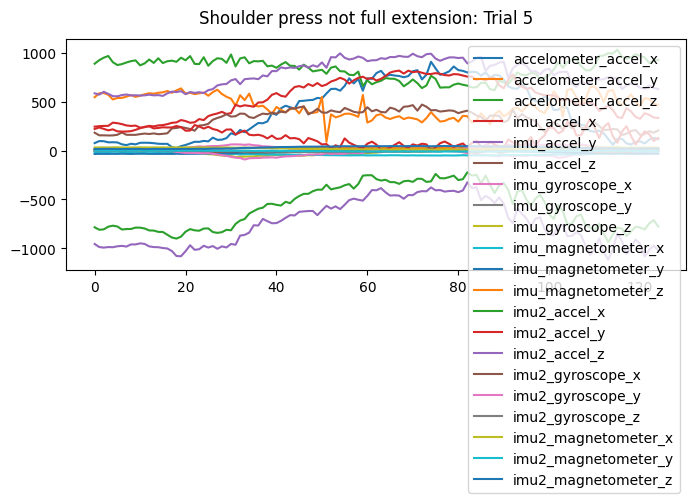

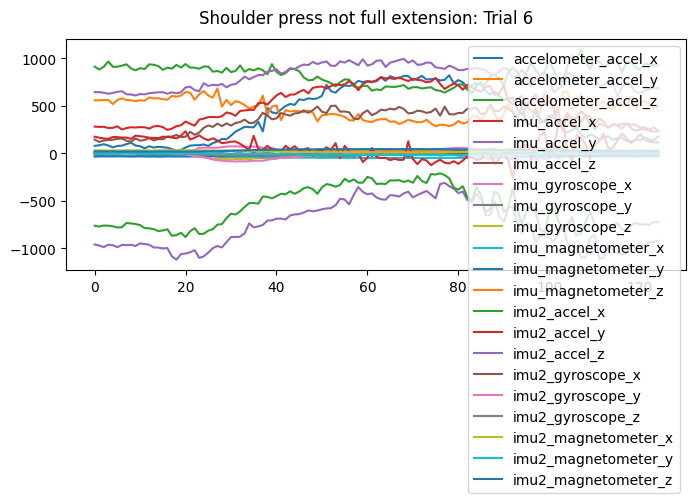

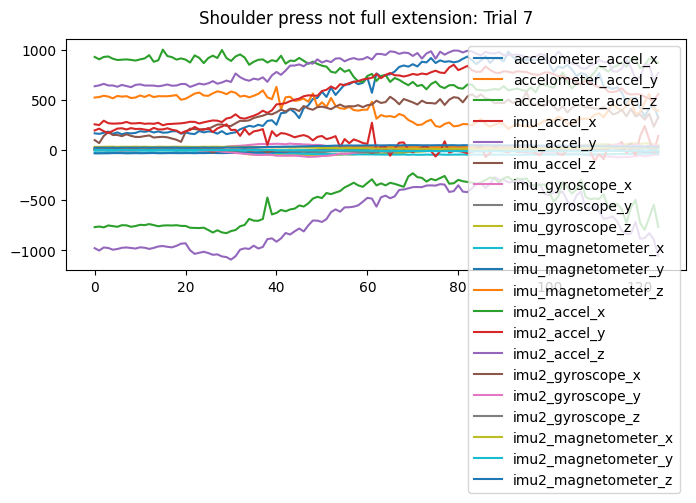

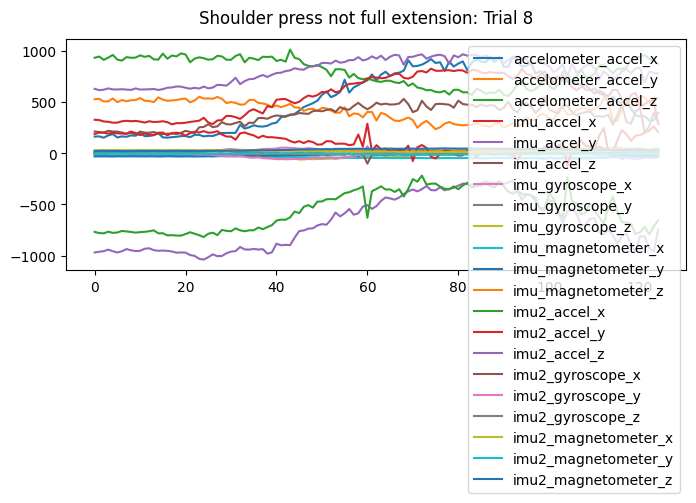

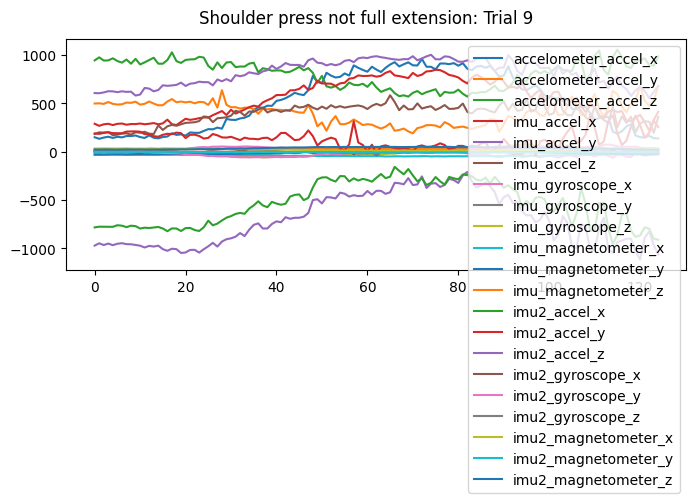

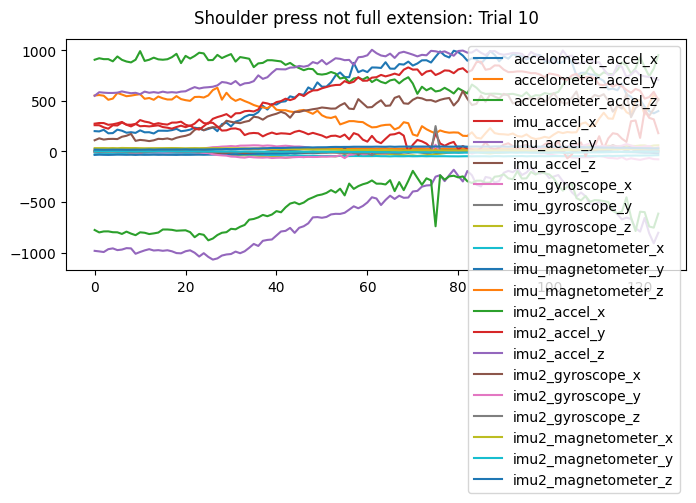

In [55]:
#Code to visualize the different classes
for gesture_key in data.item().keys():
    data_arr = np.array(data.item().get(gesture_key))
    print(gesture_key,data_arr.shape) # Array shape should be n_trials, n_samples, values
    for i in range(len(data_arr)):
        sensor_data = data_arr[i]
        fig, (ax1) = plt.subplots(1, 1,figsize=(8,3))
        fig.suptitle(gesture_key + ": Trial " + str(i+1))
        ax1.plot(sensor_data[:,0],label="accelometer_accel_x") # TODO: change these
        ax1.plot(sensor_data[:,1],label="accelometer_accel_y")
        ax1.plot(sensor_data[:,2],label="accelometer_accel_z")
        ax1.plot(sensor_data[:,3],label="imu_accel_x")
        ax1.plot(sensor_data[:,4],label="imu_accel_y")
        ax1.plot(sensor_data[:,5],label="imu_accel_z")
        ax1.plot(sensor_data[:,6],label="imu_gyroscope_x")
        ax1.plot(sensor_data[:,7],label="imu_gyroscope_y")
        ax1.plot(sensor_data[:,8],label="imu_gyroscope_z")
        ax1.plot(sensor_data[:,9],label="imu_magnetometer_x")
        ax1.plot(sensor_data[:,10],label="imu_magnetometer_y")
        ax1.plot(sensor_data[:,11],label="imu_magnetometer_z")
        ax1.plot(sensor_data[:,12],label="imu2_accel_x")
        ax1.plot(sensor_data[:,13],label="imu2_accel_y")
        ax1.plot(sensor_data[:,14],label="imu2_accel_z")
        ax1.plot(sensor_data[:,15],label="imu2_gyroscope_x")
        ax1.plot(sensor_data[:,16],label="imu2_gyroscope_y")
        ax1.plot(sensor_data[:,17],label="imu2_gyroscope_z")
        ax1.plot(sensor_data[:,18],label="imu2_magnetometer_x")
        ax1.plot(sensor_data[:,19],label="imu2_magnetometer_y")
        ax1.plot(sensor_data[:,20],label="imu2_magnetometer_z")
        ax1.legend()
        plt.show() 

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split

WINDOW_SIZE = 5

def median_filter(a):
    window_medians = sp.signal.medfilt(a, WINDOW_SIZE)
    # fig, (ax1) = plt.subplots(1, 1,figsize=(8,3))
    # ax1.plot(a,label="ax")
    # ax1.plot(window_medians,label="smooth_ax")
    # ax1.legend()
    # plt.show() 
    return window_medians

def plot_peaks(a, peaks, min, title):
    plt.plot(a)
    plt.title(title)
    [plt.axvline(p, c='C3', linewidth=0.3) for p in peaks[0]]
    [plt.axvline(m, c='C3', linewidth=0.5) for m in min[0]]
    plt.show()

def extract_ax(arr):
    return arr[:, 0:1].flatten()
def extract_ay(arr):
    return arr[:, 1:2].flatten()

# Returns tuple of arrays of x, y peaks
def get_extrema(ax, ay):
    neg_ax = np.negative(ax)
    neg_ay = np.negative(ay)
    ax_peaks = sp.signal.find_peaks(ax, prominence=0.4)
    ay_peaks = sp.signal.find_peaks(ay, prominence=0.4)
    ax_min = sp.signal.find_peaks(neg_ax, prominence=0.4)
    ay_min = sp.signal.find_peaks(neg_ay, prominence=0.4)
    # plot_peaks(ax, ax_peaks, ax_min, "Ax peaks")
    # plot_peaks(ay, ay_peaks, ay_min, "Ay peaks")
    return (ax_peaks, ax_min, ay_peaks, ay_min)

def get_prominence(ax, ax_peaks, ax_mins, ay, ay_peaks, ay_mins):
    neg_ax = np.negative(ax)
    neg_ay = np.negative(ay)
    ax_peak_prominence = sp.signal.peak_prominences(ax, ax_peaks[0])
    ay_peak_prominence = sp.signal.peak_prominences(ay, ay_peaks[0])
    ax_min_prominence = sp.signal.peak_prominences(neg_ax, ax_mins[0])
    ay_min_prominence = sp.signal.peak_prominences(neg_ay, ay_mins[0])
    return (ax_peak_prominence, ax_min_prominence, ay_peak_prominence, ay_min_prominence)

def get_feature_conditional(peaks, prominences, mode):
    if peaks[0].shape[0] == 0:
        return 0
    elif mode == 'AVG':
        return np.average(prominences[0])
    elif mode == 'SUM':
        return np.sum(prominences[0])
    elif peaks[0].shape[0] == 1 and mode == 'AVG-GAP':
        return 0
    elif mode == 'AVG-GAP':
        return np.average(np.diff(prominences[0]))

# Make changes here for the featurization code
def featurize(arr):
    fvec = np.std(arr,axis=0)
    #     fvec = arr.flatten() #Uncomment this to see the difference in performance
    return fvec
    

gesture_dict = data.item()
X = []
Y = []

# Featurize and create X, Y
for key in gesture_dict.keys():
    gest_trials = gesture_dict[key]
    means = []
    for trial in gest_trials:
        X.append(featurize(trial))
        if(key == "Shoulder press Good"):
            means.append(np.mean(trial[:, 14], axis=0))
        Y.append(key)
    if(key == "Shoulder press Good"):
        print(np.mean(means))
    

X = np.array(X)
Y = np.array(Y)

# Define classifiers
classifiers = [
    KNeighborsClassifier(),
    SVC(kernel='poly'),
    RandomForestClassifier()
]

# Train-test split instead of LOOCV
for clf_model in classifiers:
    accuracy = []
    for _ in range(10):  # Perform 10 train-test splits
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
        clf_model.fit(X_train, y_train)
        accuracy.append(clf_model.score(X_test, y_test))
    print("Train-test split accuracy for", clf_model, "is", np.mean(accuracy))

840.3941407624001
Train-test split accuracy for KNeighborsClassifier() is 1.0
Train-test split accuracy for SVC(kernel='poly') is 1.0
Train-test split accuracy for RandomForestClassifier() is 1.0


In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut

classifiers = [KNeighborsClassifier(),SVC(kernel='poly'),RandomForestClassifier()]
loo = LeaveOneOut()

for clf_model in classifiers:
    accuracy = []
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = Y[train_index], Y[test_index]
        clf_model.fit(X_train, y_train)
        accuracy.append(clf_model.score(X_test, y_test))
    print("Leave one trial out cross-val accuracy for",clf_model,"is", np.mean(accuracy))

Leave one trial out cross-val accuracy for KNeighborsClassifier() is 1.0
Leave one trial out cross-val accuracy for SVC(kernel='poly') is 1.0
Leave one trial out cross-val accuracy for RandomForestClassifier() is 1.0
